In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def generate_dataset(
        n_samples=1000,
        n_features=2,
        n_centers=4,
        cluster_std=1.0,
        center_box=(-10.0, 10.0),
        random_state=None
):
    # create generator from seed
    generator = np.random.RandomState(random_state)

    # generate coordinates of cluster center
    center_coords = generator.uniform(center_box[0], center_box[1], size=(n_centers, n_features))

    # create vector of std values
    cluster_std = np.full(n_centers, cluster_std)

    # get number of samples which belongs to each cluster
    n_samples_per_center = [int(n_samples // n_centers)] * n_centers
    for i in range(n_samples % n_centers):
        n_samples_per_center[i] += 1

    # generate coordinates of each sample
    coords = np.concatenate(
        [
            generator.normal(loc=center_coords[i], scale=std, size=(n, n_features))
            for i, (n, std) in enumerate(zip(n_samples_per_center, cluster_std))
        ]
    )
    return coords, center_coords


def partition_matrix(samples, centers, m=2):
    n_centers = centers.shape[0]
    n_samples = samples.shape[0]
    w = np.zeros((n_samples, n_centers))
    for i in range(n_samples):
        for j in range(n_centers):
            s = np.sum(
                np.array(
                    [
                        (np.linalg.norm(samples[i] - centers[j]) / np.linalg.norm(samples[i] - centers[k]))
                        for k in range(n_centers)
                    ]
                ) ** (2 / (m - 1))
            )
            w[i, j] = 1. / s
    return w


def plot_samples(samples):
    plt.figure(1, figsize=(8, 8))
    plt.scatter(samples[:, 0], samples[:, 1], c='#4E9A06', marker='.', s=10)

    
def mod_entropy(u, n_samples, n_clusters):
    pe = - np.sum(np.multiply(u, np.log(u))) / n_samples
    return pe / np.log(n_clusters)
    
def perform_generation(with_entropy=False, *args, **kwargs):
    samples, centers = generate_dataset(*args, **kwargs)
    
    plot_samples(samples)
    u = partition_matrix(samples, centers)
    entropy = mod_entropy(u, samples.shape[0], centers.shape[0])

    return entropy

# Кількість кластерів не співпадає з початковою кількістю кластерів

0.2659063336207813

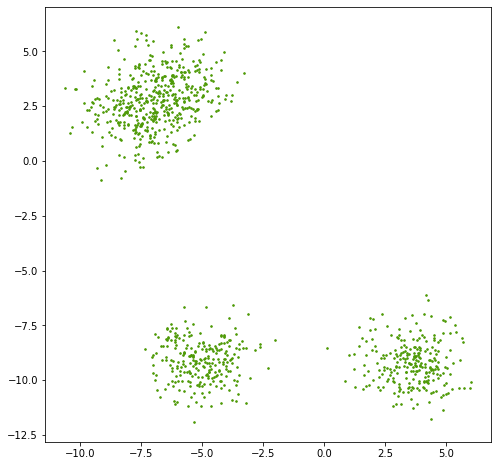

In [11]:
perform_generation(random_state=41, n_centers=4)

# Еталонна кластеризація

0.14844394210221512

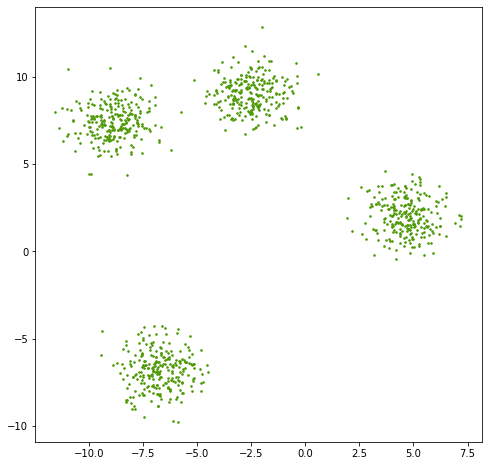

In [12]:
perform_generation(random_state=42, n_centers=4)

# Зашумлена кластеризація

0.3474352832076129

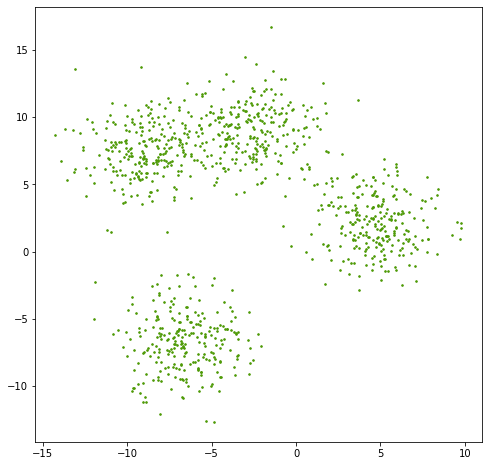

In [13]:
perform_generation(random_state=42, n_centers=4, cluster_std=2)